In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)  # None means no limit

In [3]:
import json
with open('../data/preprocessed.json', 'r') as file:
    data = json.load(file)

In [6]:
data = pd.DataFrame(data)
data

,player_id,date,first_name,last_name,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,stl,blk,turnover,pf,pts
0,56677844,1729728000000,Bilal,Coulibaly,1,2,0.500000,0,0,0.000000,6,8,0.75,1,5,6,6,1,0,3,0,8
1,265,1729728000000,Kyle,Kuzma,6,16,0.375000,0,5,0.000000,0,0,0.00,0,2,2,1,1,1,1,1,12
2,1028028405,1729728000000,Alexandre,Sarr,1,7,0.142857,0,5,0.000000,0,0,0.00,1,4,5,1,0,2,0,2,2
3,666848,1729728000000,Jordan,Poole,9,17,0.529412,6,11,0.545455,2,2,1.00,0,1,1,4,4,1,4,3,26
4,1028025235,1729728000000,Carlton,Carrington,1,6,0.166667,0,2,0.000000,1,2,0.50,0,3,3,2,0,2,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,486,1731628800000,Christian,Wood,0,0,0.000000,0,0,0.000000,0,0,0.00,0,0,0,0,0,0,0,0,0
6413,1028026974,1731628800000,Dalton,Knecht,0,1,0.000000,0,1,0.000000,0,0,0.00,0,0,0,0,0,0,0,0,0
6414,237,1731628800000,LeBron,James,0,1,0.000000,0,0,0.000000,0,0,0.00,0,1,1,0,0,0,1,0,0
6415,117,1731628800000,Anthony,Davis,0,1,0.000000,0,0,0.000000,0,0,0.00,0,0,0,0,0,0,0,0,0


# Data Exploration

### Data contains 6417 rows and 22 columns


## Column Names:

| Column       | Description                                                                                             |
|--------------|---------------------------------------------------------------------------------------------------------|
| **player_id**| A unique identifier for the player.                                                                     |
| **date**     | The date of the game in epoch time format (milliseconds since Jan 1, 1970).                             |
| **first_name**| The first name of the player.                                                                          |
| **last_name**| The last name of the player.                                                                            |
| **fgm**      | Field Goals Made - the total number of successful field goals made by the player.                       |
| **fga**      | Field Goals Attempted - the total number of field goal attempts by the player.                          |
| **fg_pct**   | Field Goal Percentage - the success rate of field goals made, calculated as `fgm / fga`.                |
| **fg3m**     | 3-Point Field Goals Made - the number of successful 3-point shots made by the player.                   |
| **fg3a**     | 3-Point Field Goals Attempted - the total number of 3-point shot attempts by the player.                |
| **fg3_pct**  | 3-Point Field Goal Percentage - the success rate of 3-point shots, calculated as `fg3m / fg3a`.         |
| **ftm**      | Free Throws Made - the total number of successful free throws made by the player.                       |
| **fta**      | Free Throws Attempted - the total number of free throw attempts by the player.                          |
| **ft_pct**   | Free Throw Percentage - the success rate of free throws, calculated as `ftm / fta`.                     |
| **oreb**     | Offensive Rebounds - the number of offensive rebounds by the player.                                    |
| **dreb**     | Defensive Rebounds - the number of defensive rebounds by the player.                                    |
| **reb**      | Total Rebounds - the sum of offensive and defensive rebounds (`oreb + dreb`).                           |
| **ast**      | Assists - the total number of assists made by the player.                                               |
| **stl**      | Steals - the number of times the player successfully stole the ball from the opposing team.             |
| **blk**      | Blocks - the total number of blocked shots by the player.                                               |
| **turnover** | Turnovers - the number of times the player lost possession of the ball to the opposing team.            |
| **pf**       | Personal Fouls - the number of personal fouls committed by the player.                                  |
| **pts**      | Points - the total number of points scored by the player (calculated based on scoring stats).           |

### Game Details

- **date**: Numeric, representing the date of the game in epoch time format (milliseconds since Jan 1, 1970).

### Player Details

- **player_id**: A unique identifier for each player, represented as a numeric ID.
- **first_name** and **last_name**: Strings, representing the first and last names of the player.
- **player**: Concatenated string of the player's full name (e.g., "LeBron James").

### Shooting Metrics

- **fgm** (Field Goals Made): Integer, the total number of successful field goals made.
- **fga** (Field Goals Attempted): Integer, the total number of field goal attempts.
- **fg_pct** (Field Goal Percentage): Float, the percentage of field goals made, calculated as `fgm / fga`.

### Three-Point Metrics

- **fg3m** (3-Point Field Goals Made): Integer, the total number of successful 3-point shots.
- **fg3a** (3-Point Field Goals Attempted): Integer, the total number of 3-point attempts.
- **fg3_pct** (3-Point Field Goal Percentage): Float, the percentage of 3-point shots made, calculated as `fg3m / fg3a`.

### Free Throw Metrics

- **ftm** (Free Throws Made): Integer, the total number of successful free throws.
- **fta** (Free Throws Attempted): Integer, the total number of free throw attempts.
- **ft_pct** (Free Throw Percentage): Float, the percentage of free throws made, calculated as `ftm / fta`.

### Rebounds

- **oreb** (Offensive Rebounds): Integer, the number of offensive rebounds.
- **dreb** (Defensive Rebounds): Integer, the number of defensive rebounds.
- **reb** (Total Rebounds): Integer, the total number of rebounds, calculated as `oreb + dreb`.

### Performance Metrics

- **ast** (Assists): Integer, the total number of assists made.
- **stl** (Steals): Integer, the total number of steals.
- **blk** (Blocks): Integer, the total number of blocked shots.
- **turnover**: Integer, the total number of turnovers committed.
- **pf** (Personal Fouls): Integer, the number of personal fouls committed.
- **pts** (Points): Integer, the total number of points scored, calculated as:  
  `pts = (fgm × 2) + fg3m + ftm`.

### Missing Data

In [9]:
data.isnull().sum()

player_id     0
date          0
first_name    0
last_name     0
fgm           0
fga           0
fg_pct        0
fg3m          0
fg3a          0
fg3_pct       0
ftm           0
fta           0
ft_pct        0
oreb          0
dreb          0
reb           0
ast           0
stl           0
blk           0
turnover      0
pf            0
pts           0
dtype: int64

Looking at our data, there is no missing data!
This means that we don't need to use imputation or any other methods used to address missing values

## Data Visualizations

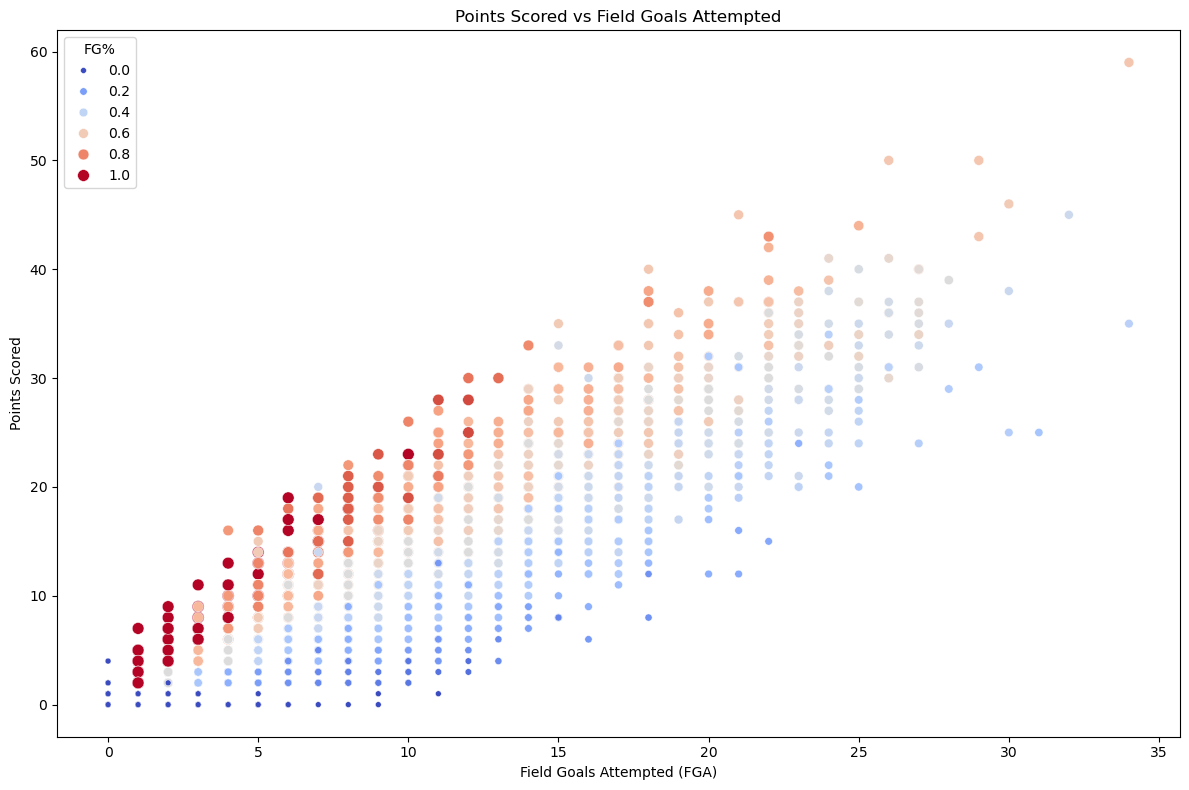

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='fga', y='pts', hue='fg_pct', palette='coolwarm', size='fg_pct')
plt.title('Points Scored vs Field Goals Attempted')
plt.xlabel('Field Goals Attempted (FGA)')
plt.ylabel('Points Scored')
plt.legend(title='FG%')
plt.tight_layout()
plt.show()

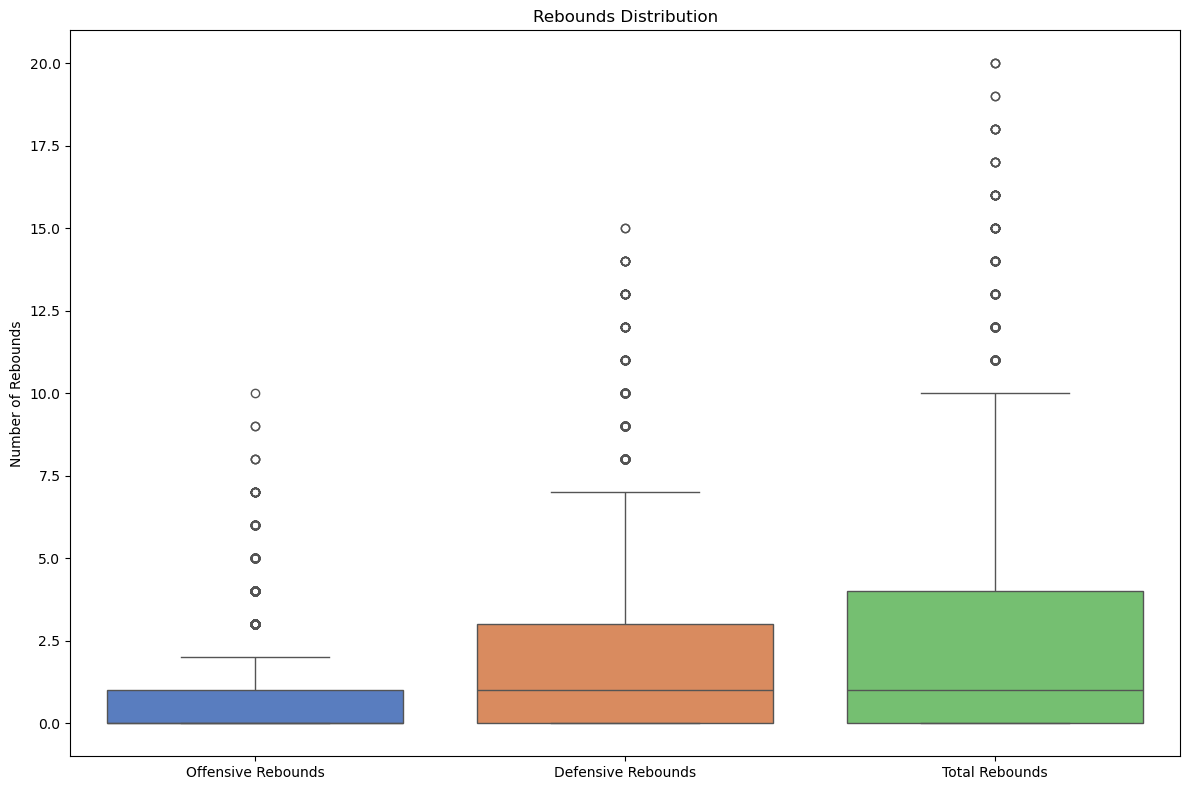

In [17]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[['oreb', 'dreb', 'reb']], palette='muted')
plt.title('Rebounds Distribution')
plt.ylabel('Number of Rebounds')
plt.xticks([0, 1, 2], ['Offensive Rebounds', 'Defensive Rebounds', 'Total Rebounds'])
plt.tight_layout()
plt.show()

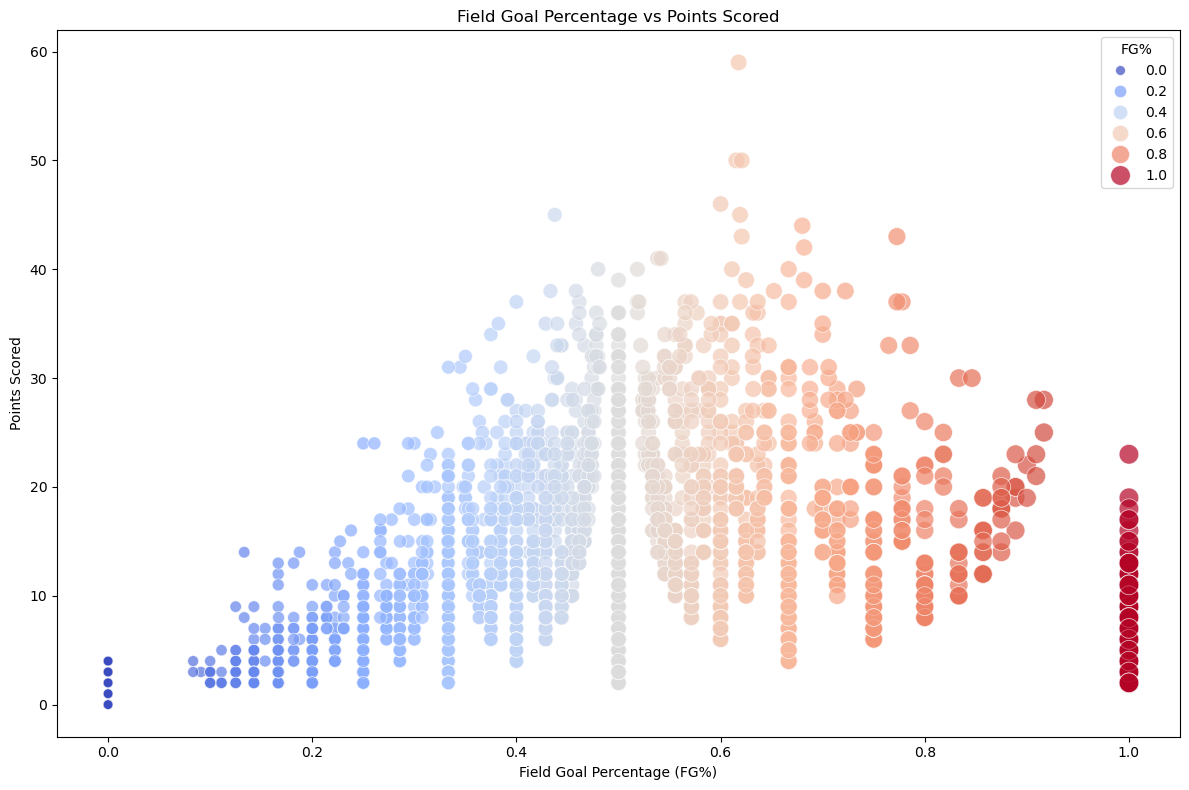

In [20]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='fg_pct', y='pts', hue='fg_pct', palette='coolwarm', size='fg_pct', sizes=(50, 200), alpha=0.7)
plt.title('Field Goal Percentage vs Points Scored')
plt.xlabel('Field Goal Percentage (FG%)')
plt.ylabel('Points Scored')
plt.legend(title='FG%')
plt.tight_layout()
plt.show()